[ 0.01915075  0.05063834 -0.06140439 -0.2386711   0.04861875  0.36659422
  0.04861875 -0.2386711  -0.06140439  0.05063834  0.01915075]
[ 0.0e+00  5.0e-05  1.0e-04 ... -1.5e-04 -1.0e-04 -5.0e-05]
[-0.5     -0.49995 -0.4999  ...  0.49985  0.4999   0.49995]


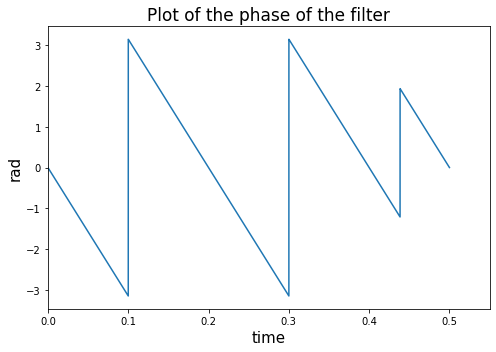

In [1]:

 

     
from scipy import signal
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
#from playsound import playsound
import wavio as wv
import os
import math




#FILTER DESIGN
numtaps = 11
f = [9500,10500]
coeff = signal.firwin(numtaps, f, pass_zero ='bandpass',fs=44100)
print(coeff)

#FILTER FREQUENCY RESPONSE
fft_coeff = fftpack.fft(coeff,20000)
pow = np.abs(fft_coeff)      #amplitude response
phase = np.angle(fft_coeff)  #computing the phase
freqs = fftpack.fftfreq(20000)
print(freqs)
idx = np.argsort(freqs)
print(freqs[idx])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax.plot(freqs[idx], phase[idx])
ax.set_xlim(left=0)
ax.set_xlabel('time', fontsize=15)
ax.set_ylabel('rad', fontsize=15)
ax.set_title('Plot of the phase of the filter', fontsize=17)
fig.tight_layout()

freq_sample_1, sig_audio_1 = wavfile.read("10kHz_44100Hz_16bit_05sec.wav")
freq_sample_2, sig_audio_2 = wavfile.read("1kHz_44100Hz_16bit_05sec.wav")

#print(freq_sample_1)
#type(sig_audio_1)

#print(freq_sample_2)
#type(sig_audio_2)
#playsound("WAV-MP3.wav")

# Output the parameters: Signal Data Type, Sampling Frequency and Duration
#print('\nShape of Signal:', sig_audio.shape)
#print('Signal Datatype:', sig_audio.dtype)
#print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')




/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


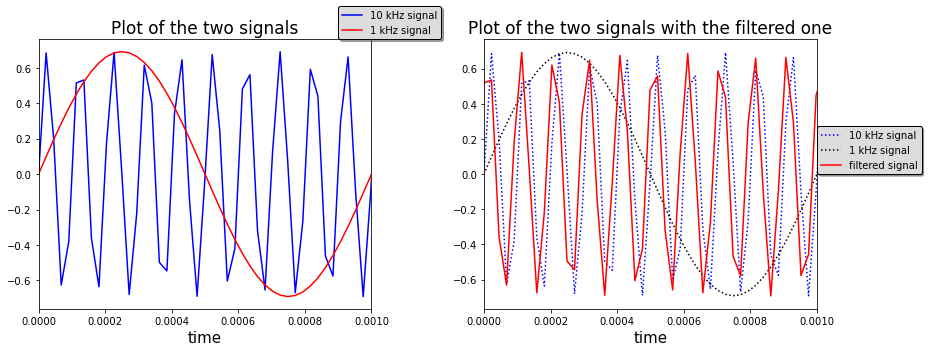

In [2]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal_1 = sig_audio_1 / np.power(2, 15) #normalizzazione
pow_audio_signal_2 = sig_audio_2 / np.power(2, 15)
#pow_audio_signal = pow_audio_signal [:100]
#time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample) #in ms
time_axis = np.arange(0, len(pow_audio_signal_1), 1) / float(freq_sample_1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax[0].plot(time_axis, pow_audio_signal_1, color='blue', label='10 kHz signal')
ax[0].plot(time_axis, pow_audio_signal_2, color='red', label='1 kHz signal')
ax[0].set_xlim(right=1/1000,left=0)
ax[0].set_xlabel('time', fontsize=15)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[0.9,1])
ax[0].set_title('Plot of the two signals', fontsize=17)

somma = pow_audio_signal_1+pow_audio_signal_2

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)

x=np.linspace(0, freq_sample_1, N)

exp = ((np.pi*(N))*0.5*x)


fft_coeff = fftpack.fft(coeff,N)    #Shift della fase


#fft_audio_1 = fftpack.fft(sig_audio_1,N)
#fft_audio_2 = fftpack.fft(sig_audio_2,N)
#out_1 = fft_audio_1*fft_coeff
#out_2 = fft_audio_2*fft_coeff
fft_somma = fftpack.fft(somma,N) 
out = fft_somma*fft_coeff
freqs = fftpack.fftfreq(N)
#plt.plot(freqs, np.abs(fft_audio_1))
#plt.plot(freqs, np.abs(fft_audio_2))
#plt.plot(freqs, np.abs(out))
#plt.xlim(left = 0)
#plt.show()
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out,N)
#print(time_output)
time_output=time_output[numtaps-1:]
ax[1].plot(time_axis,pow_audio_signal_1,':',color='blue', label='10 kHz signal')
ax[1].plot(time_axis,pow_audio_signal_2,':',color='black', label='1 kHz signal')
ax[1].plot(time_axis,time_output,color='red', label='filtered signal')
ax[1].set_xlim(right=1/1000,left=0)
ax[1].set_xlabel('time', fontsize=15)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[1,0.5])
ax[1].set_title('Plot of the two signals with the filtered one', fontsize=17)

fig.tight_layout()

#sound_name = "filter.wav"
#path=r"/home/federico/Desktop/PHD_PROJECT/MAPD_modA"
#wv.write(os.path.join(path,sound_name),time_output,44100,sampwidth=1)



